In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [136]:
benchmarks_df = pd.read_csv('../../data/processed/a_benchmarks_2024-09-11.csv')
scores_df = pd.read_csv('../../data/processed/a_scores_2024-09-11.csv')

#"C:\Users\lmmag\LevelData\predicting-proficiency\data\processed\a_benchmarks_2024-09-11.csv"


In [137]:
benchmarks_df.head()

,districtId,year,level,dataSource,value
0,45,2017,3,value_scantronMath,2356.0
1,45,2017,3,value_scantronReading,2563.0
2,45,2017,4,value_scantronMath,2493.0
3,45,2017,4,value_scantronReading,2674.0
4,45,2017,5,value_scantronMath,2584.0


In [138]:
benchmarks_df['dataSource'].unique

<bound method Series.unique of 0                value_scantronMath
1             value_scantronReading
2                value_scantronMath
3             value_scantronReading
4                value_scantronMath
5             value_scantronReading
6                value_scantronMath
7             value_scantronReading
8                value_scantronMath
9             value_scantronReading
10               value_scantronMath
11            value_scantronReading
12          value_actCompositeScore
13               value_scantronMath
14            value_scantronReading
15    value_aspireReadingScaleScore
16                   value_starMath
17               value_scantronMath
18            value_scantronReading
19    value_aspireReadingScaleScore
20                   value_starMath
21               value_scantronMath
22            value_scantronReading
23    value_aspireReadingScaleScore
24                   value_starMath
25               value_scantronMath
26            value_scantronReadi

In [139]:
scores_df.head()

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,...,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
0,44774,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44774,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44774,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44775,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44775,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
scores_df.shape

(303750, 69)

In [141]:
# Get unique values in the 'dataSource' column
test_names = benchmarks_df['dataSource'].unique().tolist()
print(test_names)



['value_scantronMath', 'value_scantronReading', 'value_actCompositeScore', 'value_aspireReadingScaleScore', 'value_starMath', 'value_actMathScore', 'value_actReadingScore', 'value_actEnglishScore', 'value_actScienceScore']


In [142]:
test_names.remove('value_aspireReadingScaleScore')
print(test_names)

['value_scantronMath', 'value_scantronReading', 'value_actCompositeScore', 'value_starMath', 'value_actMathScore', 'value_actReadingScore', 'value_actEnglishScore', 'value_actScienceScore']


In [143]:
selected_columns = ['studentId', 'studentLevel', 'year'] + test_names
scores_subset = scores_df[selected_columns]
scores_subset.head()

,studentId,studentLevel,year,value_scantronMath,value_scantronReading,value_actCompositeScore,value_starMath,value_actMathScore,value_actReadingScore,value_actEnglishScore,value_actScienceScore
0,44774,9,2018,0.0,0,0.0,0,0.0,0.0,0.0,0.0
1,44774,8,2017,2841.0,2950,0.0,0,0.0,0.0,0.0,0.0
2,44774,8,2017,2808.0,2936,0.0,0,0.0,0.0,0.0,0.0
3,44775,8,2017,2580.0,2660,0.0,0,0.0,0.0,0.0,0.0
4,44775,8,2017,2705.0,2670,0.0,0,0.0,0.0,0.0,0.0


In [144]:
# Step 2: Melt the scores_subset to create a long format
scores_long = scores_subset.melt(
    id_vars=['studentId', 'studentLevel', 'year'], 
    var_name='dataSource', 
    value_name='score'
)

# Step 3: Rename 'studentLevel' to 'level' to match benchmarks_df
scores_long.rename(columns={'studentLevel': 'level'}, inplace=True)

# Step 4: Remove the 'value_' prefix from the dataSource column
# scores_long['dataSource'] = scores_long['dataSource'].str.replace('value_', '', regex=False)

# Step 5: Drop rows with NaN scores
scores_long.dropna(subset=['score'], inplace=True)

scores_long.head(20)

,studentId,level,year,dataSource,score
0,44774,9,2018,value_scantronMath,0.0
1,44774,8,2017,value_scantronMath,2841.0
2,44774,8,2017,value_scantronMath,2808.0
3,44775,8,2017,value_scantronMath,2580.0
4,44775,8,2017,value_scantronMath,2705.0
5,44775,9,2018,value_scantronMath,0.0
6,44776,9,2018,value_scantronMath,0.0
7,44776,8,2017,value_scantronMath,2335.0
8,44776,8,2017,value_scantronMath,2193.0
9,44777,6,2017,value_scantronMath,2493.0


In [145]:
proficiency_melted_df = pd.merge(
    scores_long, 
    benchmarks_df[['year', 'level', 'dataSource', 'value']], 
    on=['year', 'level', 'dataSource'], 
    how='left'
)

# Check for any missing values after the merge
missing_benchmarks = proficiency_melted_df['value'].isna().sum()
print(f"Number of scores without corresponding benchmark: {missing_benchmarks}")

proficiency_melted_df.dropna(subset=['value'], inplace=True)
proficiency_melted_df.head(10)

Number of scores without corresponding benchmark: 1903213


,studentId,level,year,dataSource,score,value
1,44774,8,2017,value_scantronMath,2841.0,2823.0
2,44774,8,2017,value_scantronMath,2808.0,2823.0
3,44775,8,2017,value_scantronMath,2580.0,2823.0
4,44775,8,2017,value_scantronMath,2705.0,2823.0
7,44776,8,2017,value_scantronMath,2335.0,2823.0
8,44776,8,2017,value_scantronMath,2193.0,2823.0
9,44777,6,2017,value_scantronMath,2493.0,2675.0
10,44777,6,2017,value_scantronMath,2631.0,2675.0
11,44777,7,2018,value_scantronMath,2585.0,2743.0
12,44777,7,2018,value_scantronMath,2486.0,2743.0


In [146]:
#dropping duplicates of student for dataSource and year
proficiency_melted_df= proficiency_melted_df.drop_duplicates(subset=['studentId', 'year', 'dataSource'], keep='first')

# Check the result
print(proficiency_melted_df)

         studentId  level  year             dataSource   score   value
1            44774      8  2017     value_scantronMath  2841.0  2823.0
3            44775      8  2017     value_scantronMath  2580.0  2823.0
7            44776      8  2017     value_scantronMath  2335.0  2823.0
9            44777      6  2017     value_scantronMath  2493.0  2675.0
11           44777      7  2018     value_scantronMath  2585.0  2743.0
...            ...    ...   ...                    ...     ...     ...
2348063     225543     11  2018  value_actScienceScore     0.0    18.0
2348066     225544     11  2018  value_actScienceScore     0.0    18.0
2348257     225695     11  2018  value_actScienceScore     0.0    18.0
2348272     225707     11  2018  value_actScienceScore     0.0    18.0
2348315     225750     11  2018  value_actScienceScore     0.0    18.0

[278153 rows x 6 columns]


In [147]:
proficiency_melted_df['is_proficient'] = proficiency_melted_df['score'] >= proficiency_melted_df['value']
print(proficiency_melted_df.shape)
proficiency_melted_df.head(10)

(278153, 7)


,studentId,level,year,dataSource,score,value,is_proficient
1,44774,8,2017,value_scantronMath,2841.0,2823.0,True
3,44775,8,2017,value_scantronMath,2580.0,2823.0,False
7,44776,8,2017,value_scantronMath,2335.0,2823.0,False
9,44777,6,2017,value_scantronMath,2493.0,2675.0,False
11,44777,7,2018,value_scantronMath,2585.0,2743.0,False
15,44778,8,2017,value_scantronMath,2537.0,2823.0,False
17,44779,8,2017,value_scantronMath,2929.0,2823.0,True
21,44780,8,2017,value_scantronMath,2173.0,2823.0,False
23,44781,6,2017,value_scantronMath,2309.0,2675.0,False
25,44782,8,2017,value_scantronMath,2204.0,2823.0,False


In [148]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Group by year, grade, and dataSource to calculate proficiency percentage
proficiency_by_year_grade_and_test = proficiency_melted_df.groupby(['year', 'level', 'dataSource'])['is_proficient'].mean() * 100

# Reset the index to make it easier to work with
proficiency_by_year_grade_and_test = proficiency_by_year_grade_and_test.reset_index()

# Check the first few rows to ensure the data looks correct
print(proficiency_by_year_grade_and_test.head())




   year  level             dataSource  is_proficient
0  2017      3     value_scantronMath      18.109858
1  2017      3  value_scantronReading       8.688833
2  2017      4     value_scantronMath      14.426589
3  2017      4  value_scantronReading      11.675770
4  2017      5     value_scantronMath      14.768399


Used levels for year 2017: Int64Index([3, 4, 5, 6, 7, 8, 11], dtype='int64', name='level')


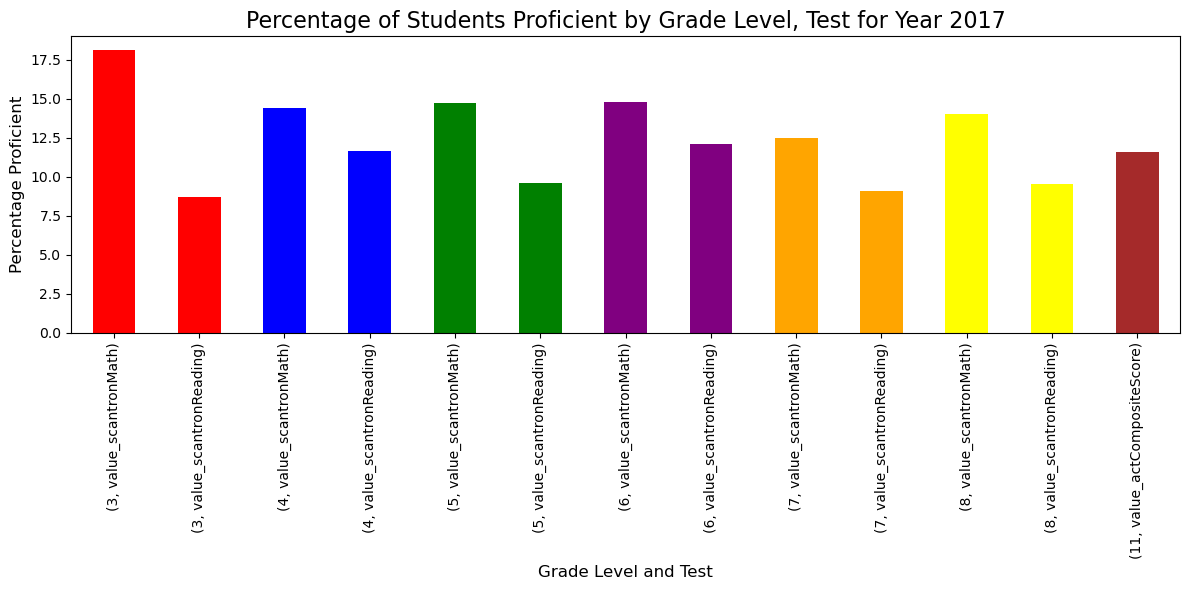

Used levels for year 2018: Int64Index([3, 4, 5, 6, 7, 8, 11], dtype='int64', name='level')


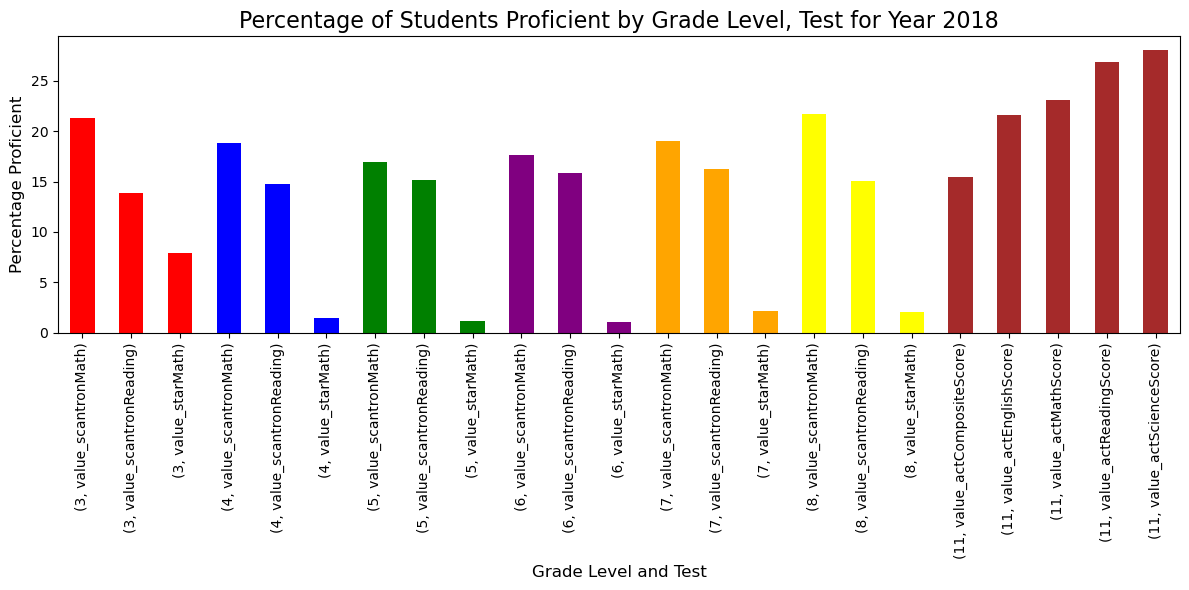

In [149]:
import matplotlib.pyplot as plt

# Define a color map for grade levels (you can adjust the colors)
color_map = {
    3: 'red',
    4: 'blue',
    5: 'green',
    6: 'purple',
    7: 'orange',
    8: 'yellow',
    11: 'brown'       

}

for year in proficiency_melted_df['year'].unique():
    df_filtered = proficiency_melted_df[proficiency_melted_df['year'] == year]
    
    # Group by grade level and dataSource (test), and calculate the mean proficiency
    proficiency_by_grade_and_test = df_filtered.groupby(['level', 'dataSource'])['is_proficient'].mean() * 100
    
    # Check which grade levels are being used in this particular year
    used_levels = proficiency_by_grade_and_test.index.get_level_values('level').unique()
    print(f"Used levels for year {year}: {used_levels}")
    
    # Check if all used levels are in the color_map
    for level in used_levels:
        if level not in color_map:
            print(f"Warning: No color for grade level {level}")
    
    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Extract grade levels and map them to colors
    colors = proficiency_by_grade_and_test.index.get_level_values('level').map(color_map)
    
    # Plot the bar chart with dynamic colors based on grade level
    proficiency_by_grade_and_test.plot(kind='bar', color=colors)
    
    # Adding labels and title
    plt.title(f'Percentage of Students Proficient by Grade Level, Test for Year {year}', fontsize=16)
    plt.xlabel('Grade Level and Test', fontsize=12)
    plt.ylabel('Percentage Proficient', fontsize=12)
    plt.xticks(rotation=90)  # Rotate x-axis labels for clarity
    
    # Display the plot
    plt.tight_layout()
    plt.show()

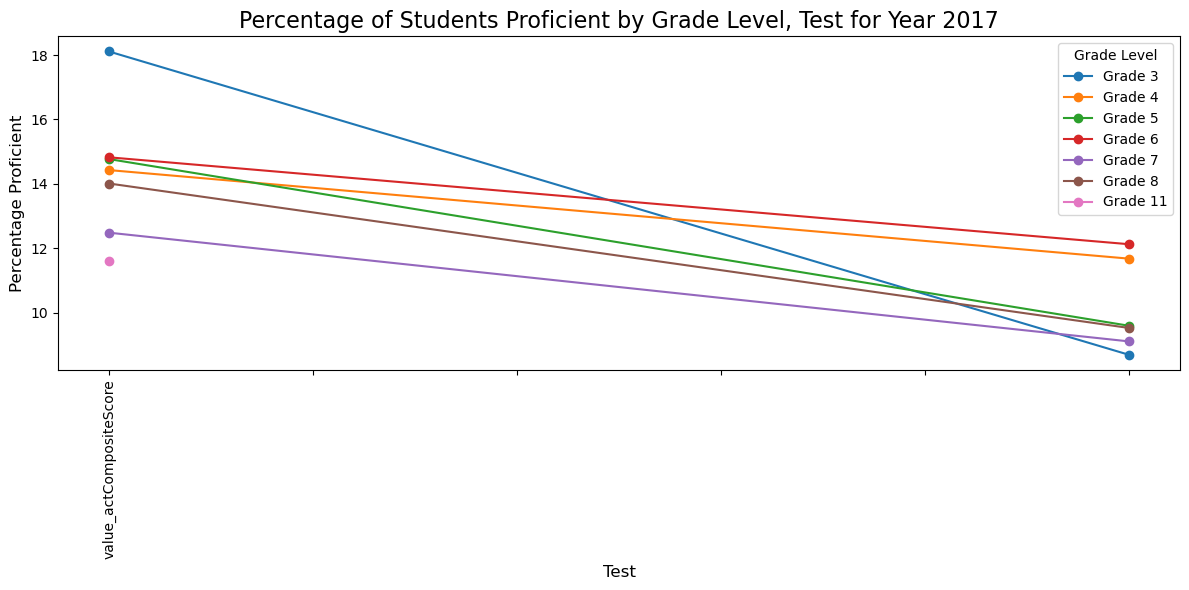

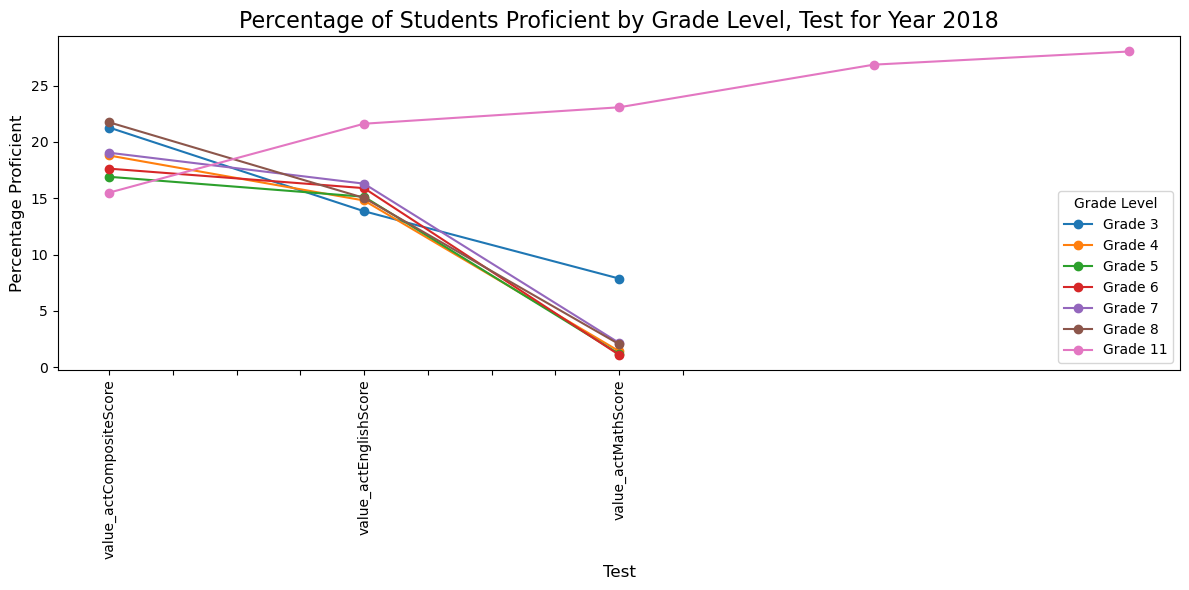

In [150]:
import matplotlib.pyplot as plt

# Example line plot for proficiency percentages by grade level and test for each year
for year in proficiency_melted_df['year'].unique():
    df_filtered = proficiency_melted_df[proficiency_melted_df['year'] == year]
    proficiency_by_grade_and_test = df_filtered.groupby(['level', 'dataSource'])['is_proficient'].mean() * 100

    plt.figure(figsize=(12, 6))

    # Plot for each grade level
    for grade in proficiency_by_grade_and_test.index.get_level_values('level').unique():
        grade_data = proficiency_by_grade_and_test.xs(grade, level='level')
        grade_data.plot(kind='line', label=f'Grade {grade}', marker='o')
    
    plt.title(f'Percentage of Students Proficient by Grade Level, Test for Year {year}', fontsize=16)
    plt.xlabel('Test', fontsize=12)
    plt.ylabel('Percentage Proficient', fontsize=12)
    plt.xticks(rotation=90)
    plt.legend(title="Grade Level")
    plt.tight_layout()
    plt.show()


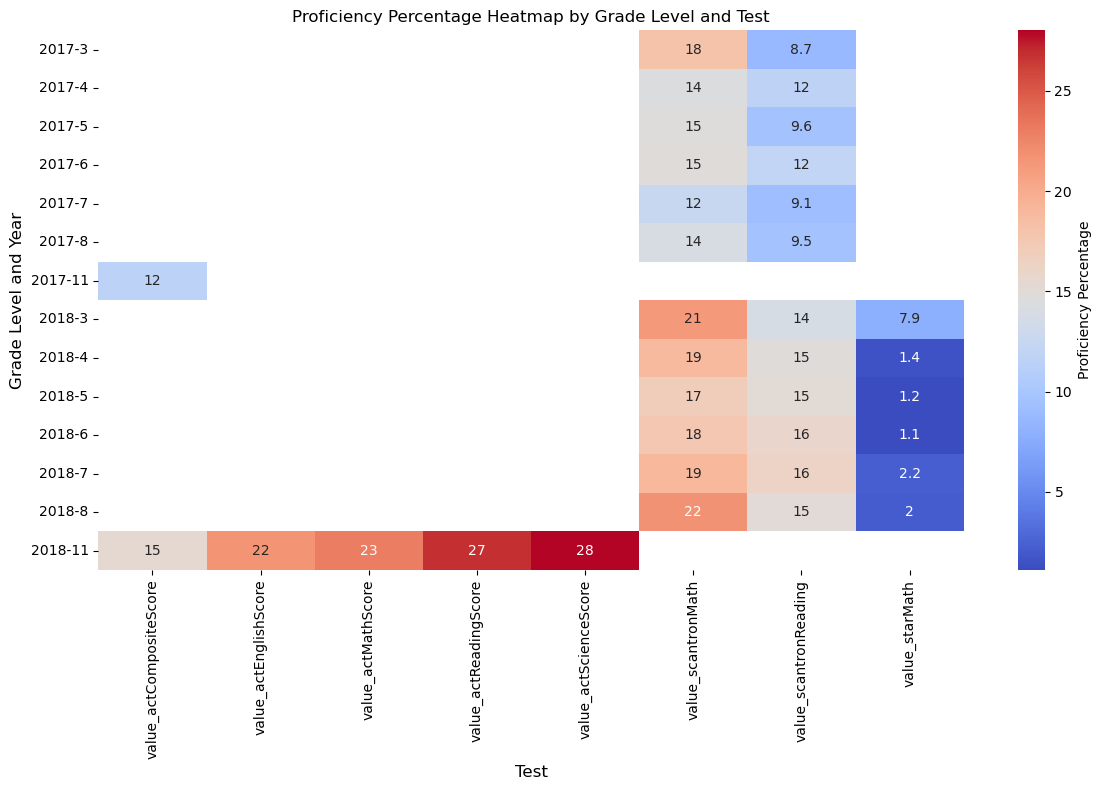

In [153]:
import seaborn as sns

proficiency_table = proficiency_melted_df.groupby(['year', 'level', 'dataSource'])['is_proficient'].mean() * 100
proficiency_table = proficiency_table.reset_index()

# Pivot the table to make it suitable for a heatmap
proficiency_table_pivot = proficiency_table.pivot(index=['year', 'level'], columns='dataSource', values='is_proficient')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(proficiency_table_pivot, annot=True, cmap='coolwarm', cbar_kws={'label': 'Proficiency Percentage'})
plt.title('Proficiency Percentage Heatmap by Grade Level and Test')
plt.xlabel('Test', fontsize=12)
plt.ylabel('Grade Level and Year', fontsize=12)
plt.tight_layout()
plt.show()


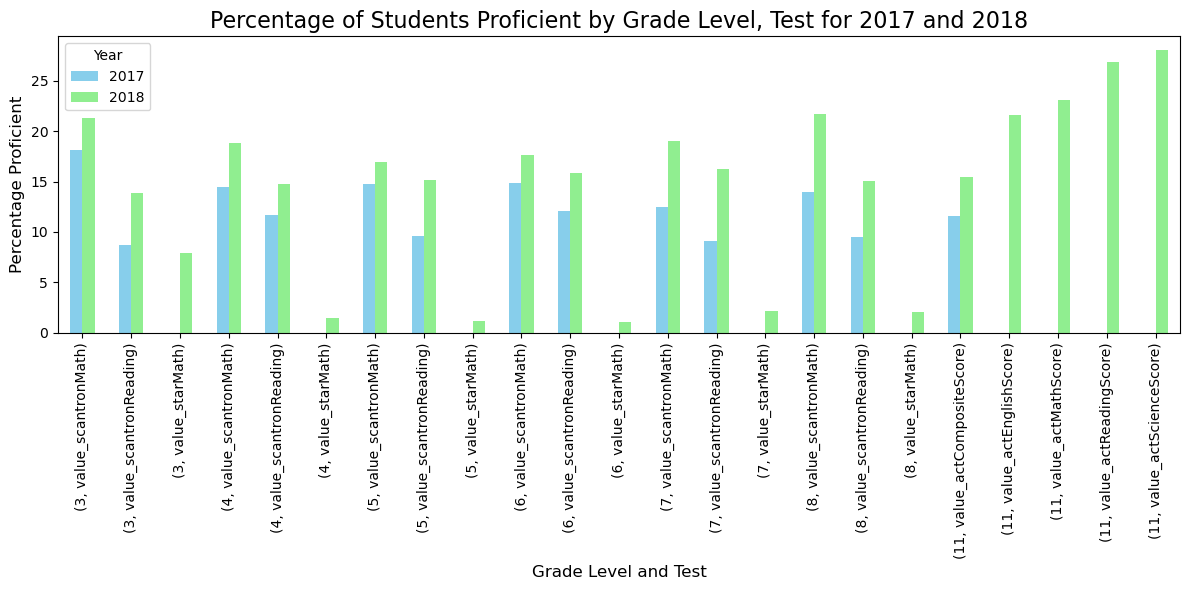

In [155]:
import matplotlib.pyplot as plt

# Filter data for 2017 and 2018
df_filtered = proficiency_melted_df[proficiency_melted_df['year'].isin([2017, 2018])]

# Calculate proficiency percentages by grade level, test, and year
proficiency_by_grade_and_test = df_filtered.groupby(['level', 'dataSource', 'year'])['is_proficient'].mean() * 100

# Unstack the data to make it suitable for grouped bar chart
proficiency_by_grade_and_test = proficiency_by_grade_and_test.unstack(level='year')

# Plot with grouped bars (one bar for each year)
proficiency_by_grade_and_test.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'lightgreen'])

# Adding labels and title
plt.title('Percentage of Students Proficient by Grade Level, Test for 2017 and 2018', fontsize=16)
plt.xlabel('Grade Level and Test', fontsize=12)
plt.ylabel('Percentage Proficient', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Year', labels=['2017', '2018'])

# Display the plot
plt.tight_layout()
plt.show()

